In [176]:
import numpy as np
import scipy.optimize
import pandas as pd
import matplotlib.pyplot as plt 

In [170]:
#Read files
measurements = np.genfromtxt('measurements.csv', delimiter=',')
groundtruth = np.genfromtxt('groundtruth.csv', delimiter=',')

In [172]:
#Stack measurements array with array of ones
sub = np.hstack((measurements, np.ones((measurements.shape[0],1))))
#Stack previous array with array of zeros & repeat
matrix = np.hstack((sub, np.zeros((sub.shape[0], 12))))
matrix = np.hstack((matrix, sub))
matrix = np.hstack((matrix, np.zeros((sub.shape[0], 12))))
matrix = np.hstack((matrix, sub))
matrix = matrix.reshape(15600,12)

# Create sigma
sigma = groundtruth.flatten()

beta = np.matmul(np.linalg.pinv(matrix), sigma)
print(beta)

[ 9.99389038e-01  3.49017510e-02  1.12915901e-06 -1.89392569e-01
 -3.48994183e-02  9.99390665e-01 -3.09984207e-07  3.06793769e-01
 -1.90617419e-05  3.69475621e-06  8.33268359e-01 -6.91834363e-04]


In [173]:
# Check with least_squares 
initial_guess = np.ones(12)

def function(x):
    return sigma-np.matmul(matrix, x)

result = scipy.optimize.least_squares(function, initial_guess)

print(result.x)

[ 9.99389038e-01  3.49017510e-02  1.12915904e-06 -1.89392569e-01
 -3.48994183e-02  9.99390665e-01 -3.09984212e-07  3.06793769e-01
 -1.90617339e-05  3.69475473e-06  8.33268359e-01 -6.91834465e-04]


In [174]:
# Create matrix A and vector b
A = [beta[0], beta[1], beta[2], beta[4], beta[5], beta[6], beta[8], beta[9], beta[10]]
A = np.array(A)
A = A.reshape(3, 3)
b = [beta[3], beta[7], beta[11]]
print(A)
print(b)

# Calibrate the measurements
calibrated_meas = np.dot(measurements, A) + b
print(calibrated_meas)

[[ 9.99389038e-01  3.49017510e-02  1.12915901e-06]
 [-3.48994183e-02  9.99390665e-01 -3.09984207e-07]
 [-1.90617419e-05  3.69475621e-06  8.33268359e-01]]
[-0.18939256891626488, 0.30679376941903924, -0.0006918343627120294]
[[  0.25201847   0.22419716 -10.58403273]
 [  0.24649155  -0.45857952  -9.60994184]
 [  0.04201947  -0.22582616  -8.07322863]
 ...
 [  0.75865093  -1.87288867  -8.27154524]
 [  1.07201901  -1.82902907  -9.08164839]
 [  0.37876543  -1.97271081  -8.77917273]]


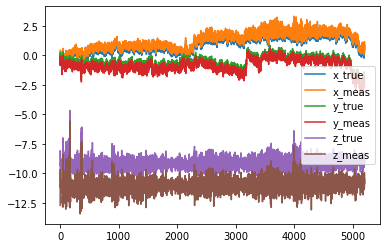

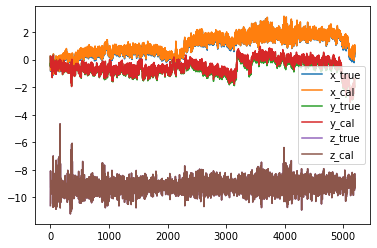

In [180]:
# Extract the x, y, and z values from the numpy arrays
x_meas = measurements[:, 0]
y_meas = measurements[:, 1]
z_meas = measurements[:, 2]

x_true = groundtruth[:, 0]
y_true = groundtruth[:, 1]
z_true = groundtruth[:, 2]

x_cal = calibrated_meas[:, 0]
y_cal = calibrated_meas[:, 1]
z_cal = calibrated_meas[:, 2]

# Plot the measured values (no calibration) vs. groundtruth
plt.plot(x_true, label='x_true')
plt.plot(x_meas, label='x_meas')
plt.plot(y_true, label='y_true')
plt.plot(y_meas, label='y_meas')
plt.plot(z_true, label='z_true')
plt.plot(z_meas, label='z_meas')
plt.legend()
plt.show()

# Plot the calibrated values vs. groundtruth
plt.plot(x_true, label='x_true')
plt.plot(x_cal, label='x_cal')
plt.plot(y_true, label='y_true')
plt.plot(y_cal, label='y_cal')
plt.plot(z_true, label='z_true')
plt.plot(z_cal, label='z_cal')
plt.legend()
plt.show()

In [179]:
#Count sum-of-squares error
truth_norm = np.linalg.norm(groundtruth, axis=1)
calib_norm = np.linalg.norm(calibrated_meas, axis=1)
sse = np.sum((truth_norm - calib_norm) ** 2)
print("SSE: ", sse)

SSE:  0.06827969988242892
